In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df = pd.read_csv("AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
df['Month'] = pd.to_datetime(df['Month'])

In [7]:
df.index = df['Month']

In [8]:
df = df.rename(columns={'#Passengers':'Passengers'})

In [9]:
del df['Month']

<Figure size 1500x1000 with 0 Axes>

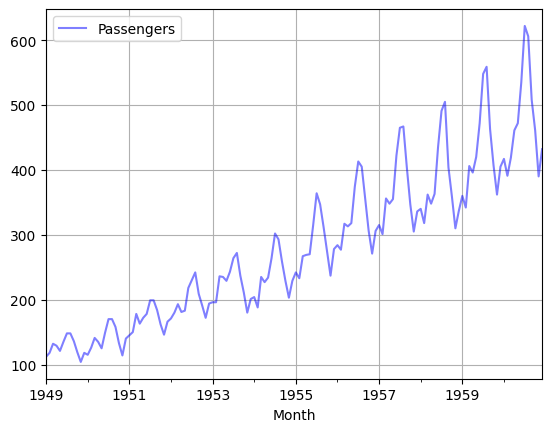

In [10]:
plt.figure(figsize=(15,10))
df.plot(color='blue',alpha=0.5)
plt.grid(True)
plt.show()

In [11]:
mean_log = df.rolling(window=12).mean()
std_log = df.rolling(window=12).std()

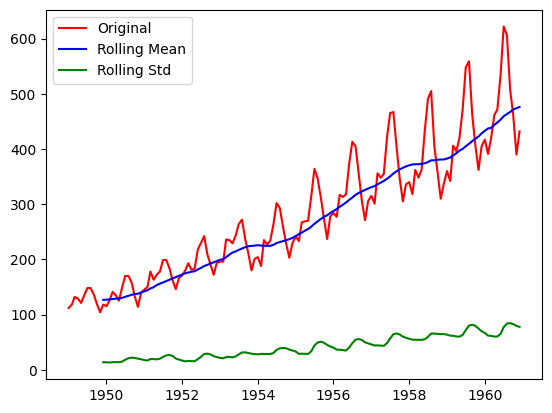

In [12]:
plt.plot(df,color='red',label='Original')
plt.plot(mean_log,color='blue',label='Rolling Mean')
plt.plot(std_log,color='green',label='Rolling Std')
plt.legend(loc='best')

In [13]:
from statsmodels.tsa.stattools import adfuller
print(adfuller(df['Passengers']))

(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [14]:
first_log = np.log(df)
first_log = first_log.dropna()
print(adfuller(first_log['Passengers']))

(-1.7170170891069683, 0.4223667747703874, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -445.3990312497209)


In [114]:
first_log

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [15]:
mean_first_log = first_log.rolling(window=12).mean()

In [16]:
new_log = first_log - mean_first_log
new_log.dropna(inplace=True)
print(adfuller(new_log['Passengers']))

(-3.1629079913008833, 0.022234630001242206, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747034)


<Axes: xlabel='Month'>

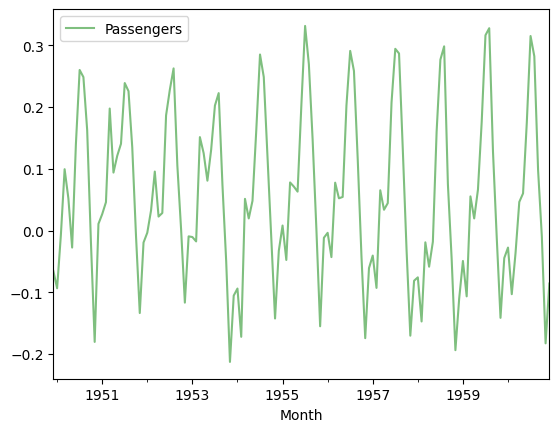

In [17]:
new_log.plot(color='green',alpha=0.5)

In [18]:
new_log.head()

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [19]:
mean_new_log = new_log.rolling(window=12).mean()
std_new_log = new_log.rolling(window=12).std()

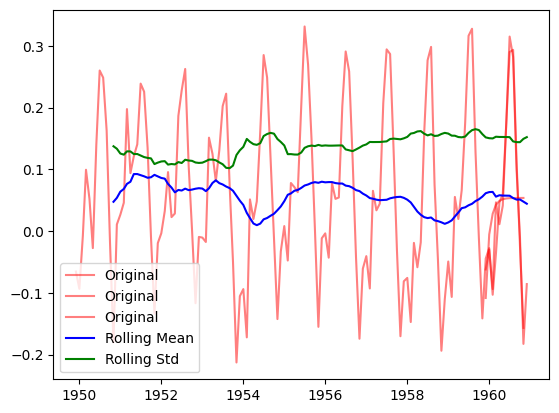

In [42]:
plt.plot(new_log,color='red',label='Original',alpha=0.5)
plt.plot(mean_new_log,color='blue',label='Rolling Mean')
plt.plot(std_new_log,color='green',label='Rolling Std')
plt.legend(loc='best')

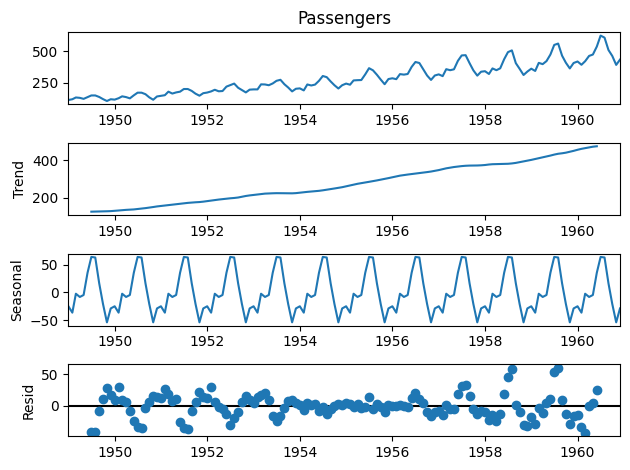

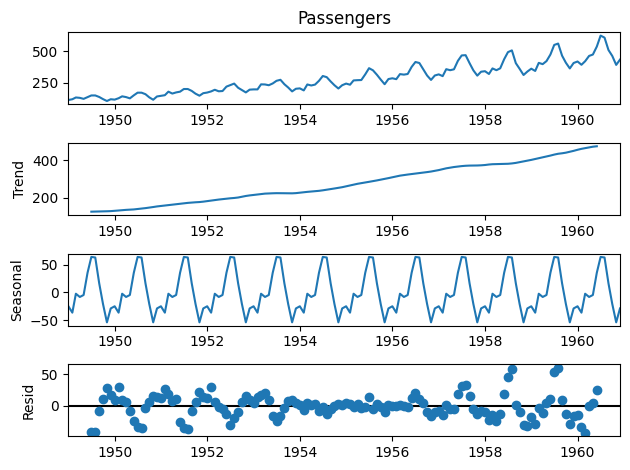

In [21]:
sdr = seasonal_decompose(df['Passengers'].dropna())
sdr.plot()

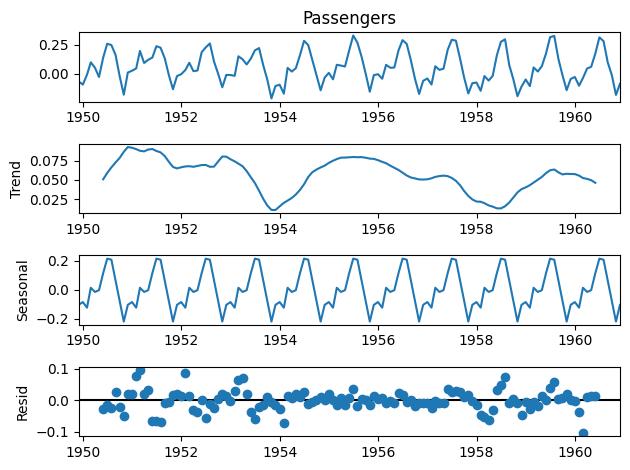

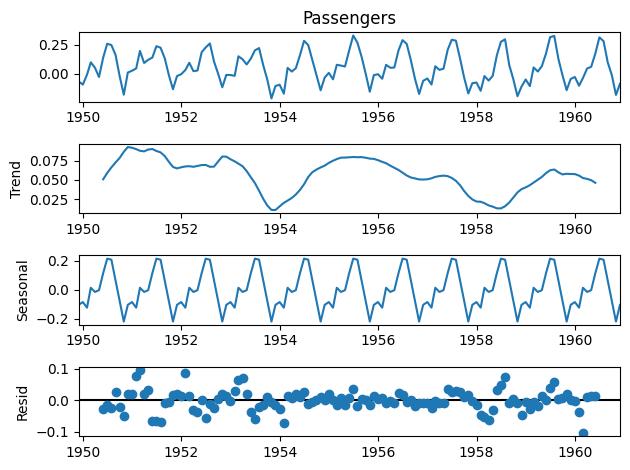

In [22]:
sdr1 = seasonal_decompose(new_log['Passengers'].dropna())
sdr1.plot()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

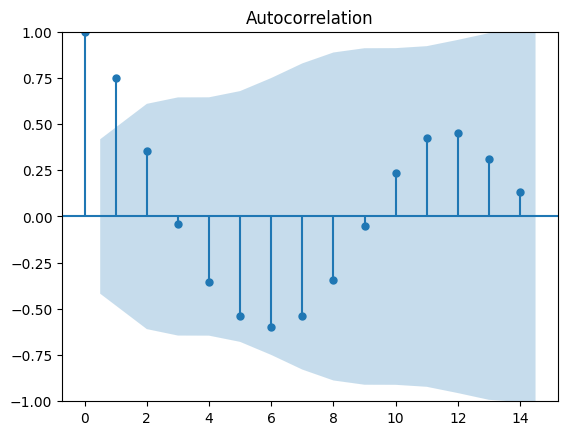

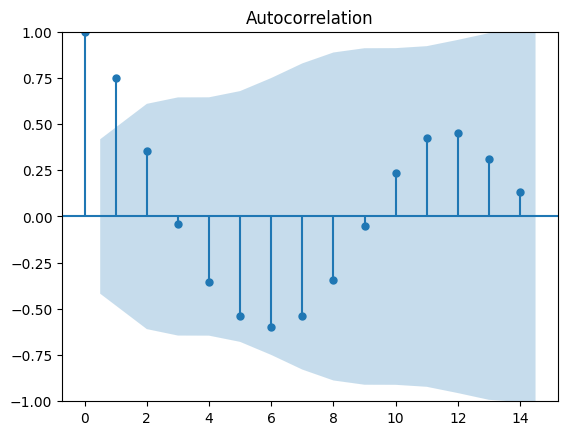

In [24]:
acf_plot = acf(new_log)
pacf_plot = pacf(new_log)
plot_acf(acf_plot)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


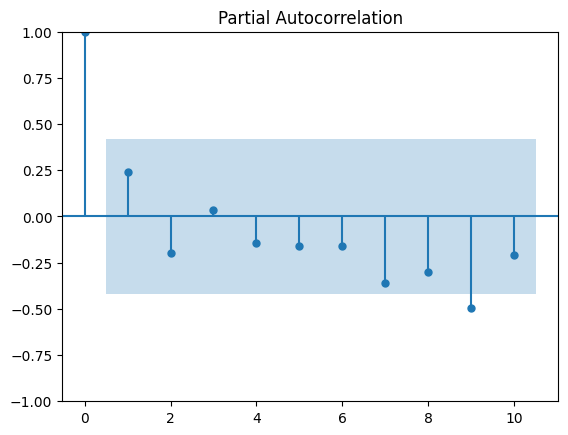

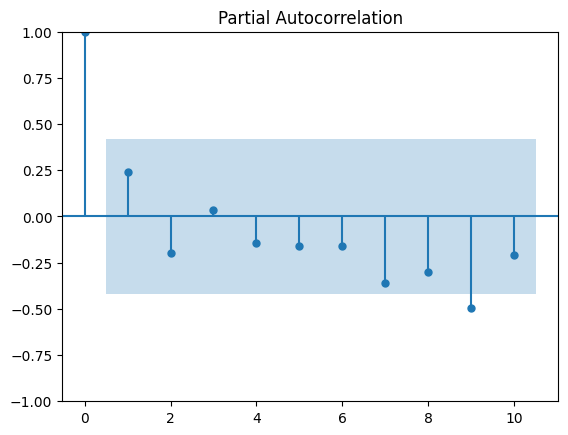

In [25]:
plot_pacf(pacf_plot,lags = 10)

In [30]:
from statsmodels.tsa.arima.model import ARIMA
train = new_log[:120]['Passengers']
test = new_log[121:]['Passengers']
model = ARIMA(train, order=(1,0,2))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 117.901
Date:                Sun, 16 Apr 2023   AIC                           -225.803
Time:                        06:13:28   BIC                           -211.865
Sample:                    12-01-1949   HQIC                          -220.143
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0538      0.022      2.446      0.014       0.011       0.097
ar.L1          0.4323      0.318      1.361      0.173      -0.190       1.055
ma.L1          0.5917      0.323      1.829      0.067      -0.042       1.226
ma.L2         -0.0778      0.279     -0.279      0.780      -0.625       0.469
sigma2         0.0081      0.002      4.769      0.000       0.005       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.02
Prob(Q):                              0.92   Prob(JB):                         0.05
Heteroskedasticity (H):               1.21   Skew:                            -0.08
Prob(H) (two-sided):                  0.55   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
new_log['Predicted'] = model_fit.predict(start = len(train), end = len(train) + len(test) - 1, dynamic=True)

<Axes: xlabel='Month'>

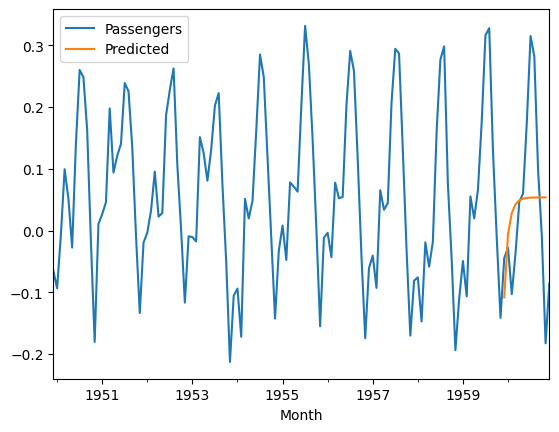

In [32]:
new_log[['Passengers','Predicted']].plot()

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [34]:
model1 = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model1_fit = model1.fit()
model1_fit.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  120
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 12)   Log Likelihood                 220.461
Date:                            Sun, 16 Apr 2023   AIC                           -426.923
Time:                                    06:24:03   BIC                           -407.410
Sample:                                12-01-1949   HQIC                          -418.998
                                     - 11-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4767      0.194      2.457      0.014       0.096       0.857
ma.L1          0.1293      0.189      0.685      0.493      -0.240       0.499
ma.L2          0.3143      0.146      2.151      0.031       0.028       0.601
ar.S.L12       0.9862      0.013     77.908      0.000       0.961       1.011
ma.S.L12      -0.5445      0.145     -3.746      0.000      -0.829      -0.260
ma.S.L24      -0.0112      0.136     -0.082      0.935      -0.278       0.256
sigma2         0.0012      0.000      7.810      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.97
Prob(Q):                              1.00   Prob(JB):                         0.23
Heteroskedasticity (H):               0.37   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
new_log['Seasonal Predicted'] = model1_fit.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_log.tail()

,Passengers,Predicted,Seasonal Predicted
Month,,,
1960-08-01,0.282363,0.053610,0.293595
1960-09-01,0.098235,0.053705,0.111355
1960-10-01,-0.009230,0.053746,-0.023556
1960-11-01,-0.182690,0.053763,-0.156727
1960-12-01,-0.085789,NaN,NaN


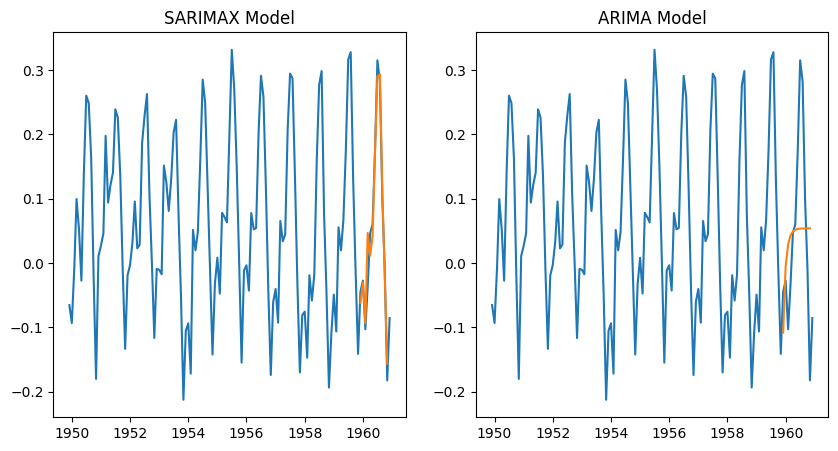

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(new_log[['Passengers','Seasonal Predicted']])
plt.title('SARIMAX Model')
plt.subplot(1,2,2)
plt.plot(new_log[['Passengers','Predicted']])
plt.title('ARIMA Model')
plt.show()

<Axes: xlabel='Month'>

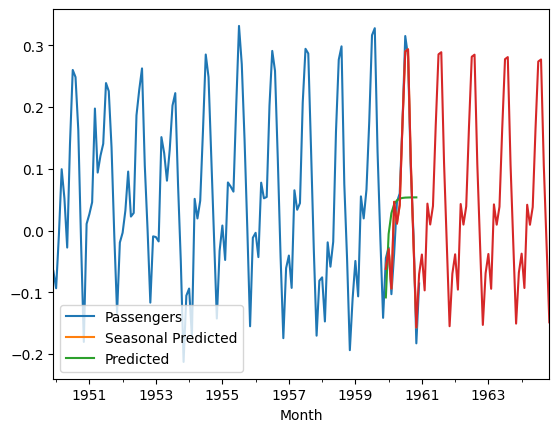

In [112]:
fc = model1_fit.forecast(steps=60)
new_log.plot()
fc.plot()

In [113]:
fc

1959-12-01   -0.062037
1960-01-01   -0.030117
1960-02-01   -0.093866
1960-03-01    0.046608
1960-04-01    0.011217
1960-05-01    0.041316
1960-06-01    0.173384
1960-07-01    0.290059
1960-08-01    0.293595
1960-09-01    0.111355
1960-10-01   -0.023556
1960-11-01   -0.156727
1960-12-01   -0.070656
1961-01-01   -0.038819
1961-02-01   -0.096882
1961-03-01    0.043626
1961-04-01    0.009844
1961-05-01    0.039748
1961-06-01    0.170748
1961-07-01    0.285503
1961-08-01    0.288900
1961-09-01    0.109481
1961-10-01   -0.023503
1961-11-01   -0.154937
1961-12-01   -0.069893
1962-01-01   -0.038473
1962-02-01   -0.095638
1962-03-01    0.042983
1962-04-01    0.009688
1962-05-01    0.039191
1962-06-01    0.168393
1962-07-01    0.281572
1962-08-01    0.284923
1962-09-01    0.107973
1962-10-01   -0.023179
1962-11-01   -0.152804
1962-12-01   -0.068931
1963-01-01   -0.037944
1963-02-01   -0.094322
1963-03-01    0.042391
1963-04-01    0.009554
1963-05-01    0.038652
1963-06-01    0.166076
1963-07-01 

In [128]:
df_new = pd.DataFrame(fc)

In [129]:
df_new = df_new.rename(columns={'predicted_mean':'predicted'})

In [130]:
df_new

,predicted
1959-12-01,-0.062037
1960-01-01,-0.030117
1960-02-01,-0.093866
1960-03-01,0.046608
1960-04-01,0.011217
1960-05-01,0.041316
1960-06-01,0.173384
1960-07-01,0.290059
1960-08-01,0.293595
1960-09-01,0.111355
